In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../data/datasets/onemonthprocessed_nodeload5.csv')
df['ds'] = pd.to_datetime(df['ds'], dayfirst=True)
df = df.drop_duplicates(subset=['ds'], keep='first')
print(df.head(5))
print(df.tail(5))
print(df.describe())
print(df.dtypes)
print(len(df['y']))

                   ds     y
0 2024-05-14 04:37:05  2.90
1 2024-05-14 04:37:10  2.90
2 2024-05-14 04:37:15  2.95
3 2024-05-14 04:37:20  2.95
4 2024-05-14 04:37:25  2.95
                        ds     y
526466 2024-06-13 23:59:40  2.53
526467 2024-06-13 23:59:45  2.56
526468 2024-06-13 23:59:50  2.56
526469 2024-06-13 23:59:55  2.56
526470 2024-06-14 00:00:00  2.56
                                  ds              y
count                         526441  526441.000000
mean   2024-05-29 18:09:31.417471744       4.341710
min              2024-05-14 04:37:05       0.860000
25%              2024-05-22 03:16:25       2.210000
50%              2024-05-29 18:08:35       4.640000
75%              2024-06-06 09:01:55       5.990000
max              2024-06-14 00:00:00      11.640000
std                              NaN       2.203049
ds    datetime64[ns]
y            float64
dtype: object
526441


In [3]:
df['y'].isnull().values.any()

False

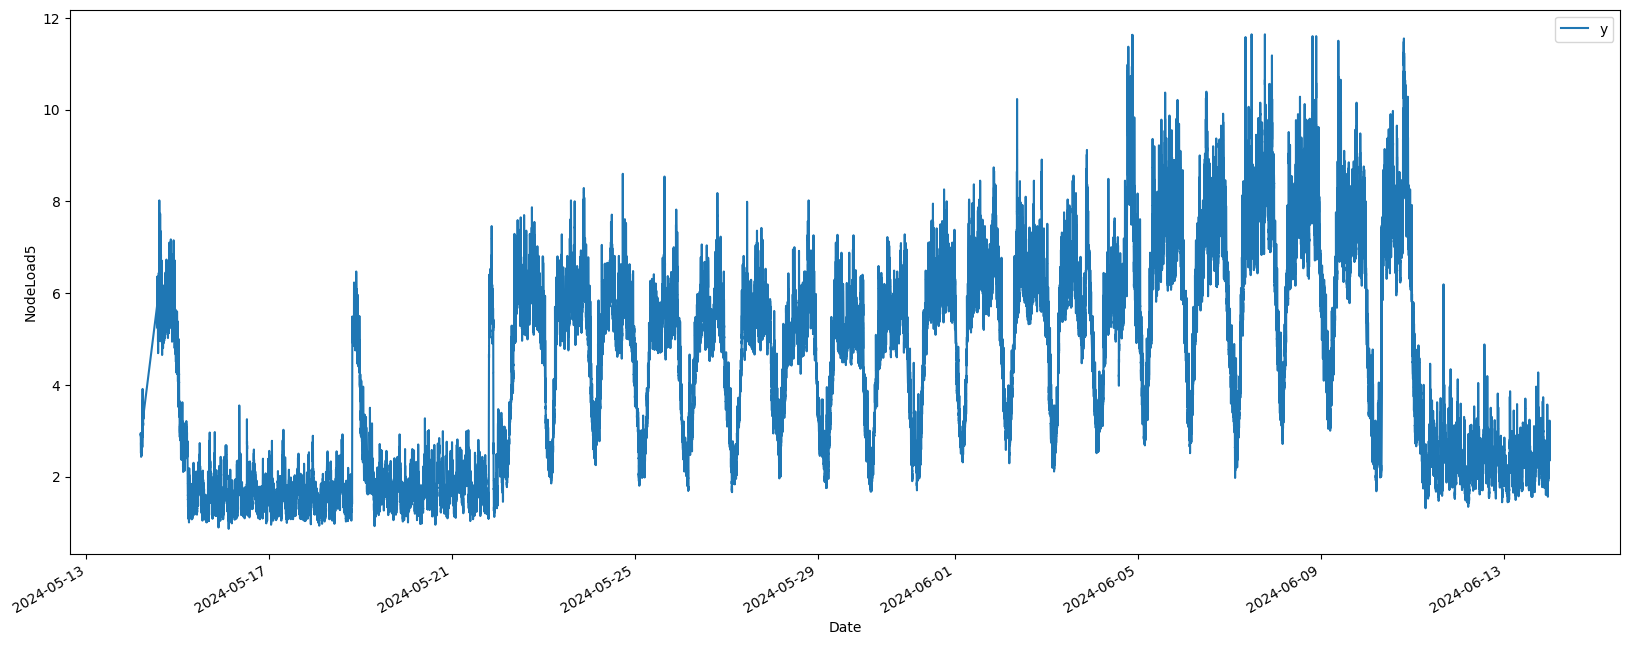

In [4]:
ax = df.set_index('ds').plot(figsize=(20, 8))
ax.set_ylabel('NodeLoad5')
ax.set_xlabel('Date')

plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='5s', valid_p = 0.2)
metrics = m.fit(df_train, freq='5s', validation_df=df_val)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Training: |                                                                                                   …

Finding best initial lr:   0%|          | 0/290 [00:00<?, ?it/s]

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

In [6]:
metrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,2.801068,2.899430,0.303224,0.0,0,0.294440,0.0,3.464527,4.226206,0.294301,0.0
1,3.016898,3.107266,0.337365,0.0,1,0.030756,0.0,0.866457,1.201312,0.030754,0.0
2,2.945285,3.039488,0.324830,0.0,2,0.027470,0.0,0.819144,1.090437,0.027470,0.0
3,2.999244,3.085635,0.332067,0.0,3,0.025282,0.0,0.785941,1.015364,0.025281,0.0
4,3.320463,3.395166,0.371815,0.0,4,0.023821,0.0,0.759634,0.972365,0.023821,0.0
5,3.132337,3.209208,0.349017,0.0,5,0.023441,0.0,0.748703,0.960115,0.023441,0.0
6,3.074255,3.156148,0.341265,0.0,6,0.023173,0.0,0.742362,0.953677,0.023172,0.0
7,2.995367,3.075840,0.329731,0.0,7,0.022934,0.0,0.737557,0.948915,0.022935,0.0
8,3.266561,3.345973,0.370243,0.0,8,0.022383,0.0,0.728026,0.937900,0.022383,0.0
9,3.314984,3.391003,0.374784,0.0,9,0.021920,0.0,0.720356,0.928802,0.021917,0.0


In [7]:
import warnings
warnings.filterwarnings('ignore', 'Trying to infer the `batch_size`', UserWarning)

future = m.make_future_dataframe(df, periods=17280*10, n_historic_predictions=len(df))
forecast = m.predict(future)
forecast.to_csv('../data/predicted/neural_month_predicted_nodeload5.csv', index=False)
forecast

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5s corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /Library/Python/3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col

Predicting: |                                                                                                 …

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly,season_daily
0,2024-05-14 04:37:05,2.90,3.667105,5.910781,-0.298744,-1.944932
1,2024-05-14 04:37:10,2.90,3.666954,5.910629,-0.298744,-1.944932
2,2024-05-14 04:37:15,2.95,3.666802,5.910478,-0.298744,-1.944932
3,2024-05-14 04:37:20,2.95,3.666650,5.910326,-0.298744,-1.944932
4,2024-05-14 04:37:25,2.95,3.666499,5.910174,-0.298744,-1.944932
...,...,...,...,...,...,...
699236,2024-06-23 23:59:40,NaN,10.077511,10.639849,-0.176032,-0.386307
699237,2024-06-23 23:59:45,NaN,10.077525,10.639863,-0.176032,-0.386307
699238,2024-06-23 23:59:50,NaN,10.077539,10.639878,-0.176032,-0.386307
699239,2024-06-23 23:59:55,NaN,10.077552,10.639891,-0.176032,-0.386307


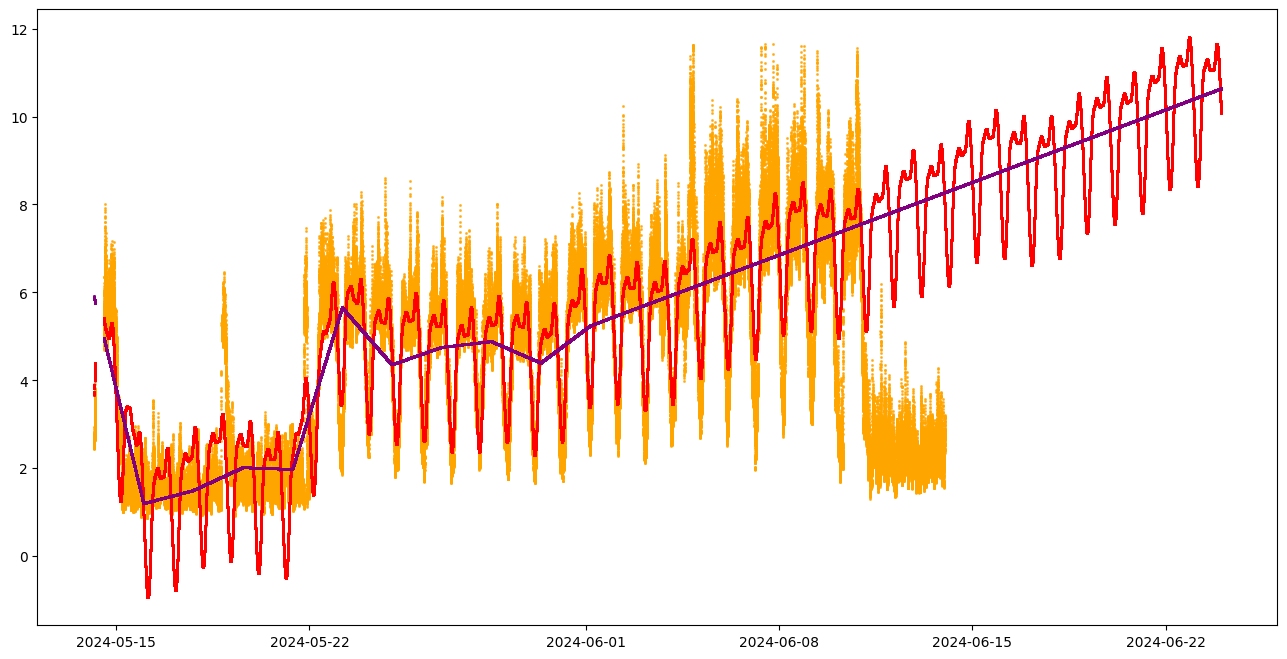

In [8]:
plt.figure(figsize = (16,8))
plt.scatter(df['ds'], df['y'], color='orange', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['yhat1'], color='red', alpha=0.5, s =1)
plt.scatter(forecast['ds'], forecast['trend'], color='purple', alpha=0.5, s =1)